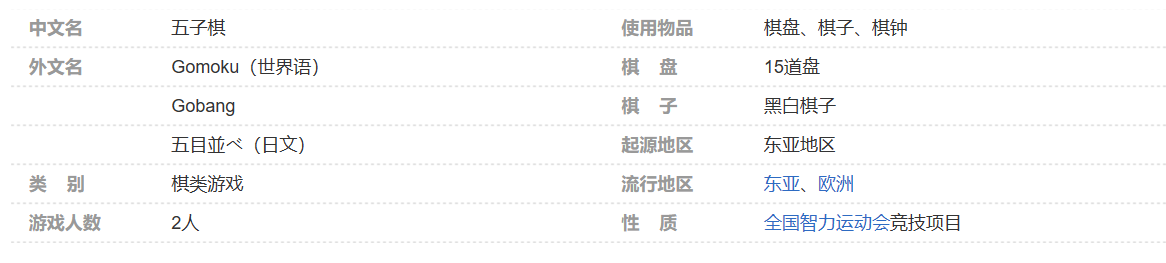

In [1]:
#导入相关库

from tkinter import *  #导入Python 自带的图形界面库
import tkinter.messagebox as tm
import numpy as np

# 主程序模块main 和 初始化模块setstart,start,quit

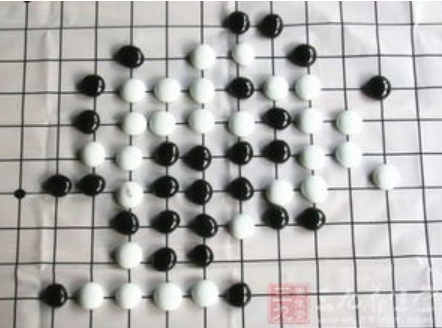

In [51]:
#初始化设置,创建棋盘上的线条和点

def setstart():#初始化模块
    for i in range(0, 15):
        window.create_line(i * 40 + 20, 20, i * 40 + 20, 580)
        window.create_line(20, i * 40 + 20, 580, i * 40 + 20)
        
    window.create_oval(135, 135, 145, 145,fill='black')
    window.create_oval(295, 295, 305, 305,fill='black')
    window.create_oval(135, 455, 145, 465,fill='black')
    window.create_oval(465, 135, 455, 145,fill='black')
    window.create_oval(455, 455, 465, 465,fill='black')

In [52]:
def start():#开始模块
    global root,window
    root = Tk()
    root.title("棋盘")#设置窗口名
    
    window = Canvas(root, width=600,height=600,background='white')#设置窗口的长宽和背景颜色
    window.pack()
    
    setstart()
    
    window.bind("<Button -1>",main)#每次点击左键以后进行一次主程序模块
    window.pack()

In [53]:
def quit():#退出模块
    root.destroy()
    #重置
    num=0
    FIR=np.full((15,15),0)
    SEC=np.full((15,15),'')


In [54]:
def main(eve):#主模块
    global num,FIR,SEC
    #############################################################################
    for j in range (0,15):#定位点击位置最近的网格线交点（i，j），让棋子落在线的交点处。
        for i in range (0,15):
            if (eve.x - 20 - 40 * i) ** 2 + (eve.y - 20 - 40 * j) ** 2 <= 2 * 20 ** 2:
                break
        if (eve.x - 20 - 40 * i) ** 2 + (eve.y - 20 - 40 * j) ** 2 <= 2*20 ** 2:
            break
    #############################################################################    
            
    if num % 2 == 0 and FIR[i][j] != 1:#判断现在这颗棋子的颜色,且是否存在,不存在才可以创建。
        window.create_oval(40*i+5, 40*j+5, 40*i+35, 40*j+35,fill='black')#创建黑白棋
        FIR[i][j] = 1#该点已有棋子
        SEC[i][j] = 'b'#记录该点棋子颜色为黑色
        num += 1#棋子数加一
    if num % 2 != 0 and FIR[i][j] != 1 :
        window.create_oval(40*i+5, 40*j+5, 40*i+35, 40*j+35,fill='white')
        FIR[i][j] = 1.
        SEC[i][j] = 'w'#记录该点棋子颜色为白色
        num += 1

    f = [[-1, 0], [-1, 1], [0, 1], [1, 1]]
    for z in range(0, 4):#对应棋子只有在四条线上五子相连才获胜
        a, b = f[z][0], f[z][1]
        count1, count2 = 0, 0
        x, y = i, j
        
        #判断颜色是否相同,如果相同在在同一方向上看颜色是否还是相同,直至判断胜利还是继续下棋
  
        #############################################################################
        while SEC[x][y] == SEC[i][j]:
            count1 += 1
            if x + a >= 0 and y + b >= 0 and x + a < 15 and y + b < 15 and SEC[x + a][y + b] == SEC[i][j]:#保证不超出棋盘边界
                [x, y] = np.array([x, y]) + np.array([a, b])#向该方向前进一步再判断该坐标下棋子的颜色
            else:
                x, y = i, j#该方向再没有相同颜色的棋子时回到落子处
                break
        while SEC[x][y] == SEC[i][j]:#再从另一个方向开始判断相同颜色棋子个数
            count2 += 1
            if x - a < 15 and y - b < 15 and x - a >= 0 and y - b >= 0 and SEC[x - a][y - b] == SEC[i][j]:
                [x, y] = np.array([x, y]) - np.array([a, b])
            else:
                break
        ##############################################################################
                  
        if count1 + count2 >= 6:#判断好有五子或以上连成一串后看是黑色还是白色判断胜者,因为在从反方向计算棋数的时候本身落子计算了两次
            if SEC[i][j] == 'b':
                tm.showinfo('结果', '黑棋获胜')
                quit()
            else:
                tm.showinfo('结果', '白棋获胜')
                quit()#胜利后就销毁窗口

#从落子处算先向一端算，直到遇到另一种颜色的棋子，反向查询遇到另一个颜色棋处出停止，当达到五颗棋子时即代表一方获胜，否则循环下一条线。
#当四条线结束未达到胜利条件，即可继续落子。

In [55]:
num=0#计算棋盘上棋子个数，用以判断棋子颜色
FIR=np.full((15,15),0)#矩阵对应棋盘
SEC=np.full((15,15),'')#用来记录对应位置棋子的颜色

root_start = Tk()
root_start.title("♥用心创造游戏♥")
window_start = Canvas(root_start, width=400,height=2,background='white')
window_start.pack()
a=Button(root_start,text="开始",width=40,height=1,command=start,font=('楷体',15))
a.pack()
b=Button(root_start,text="退出",width=40,height=1,command=quit,font=('楷体',15))
b.pack()
mainloop() # 进入等待与处理窗口事件

|成员           |分工            |
|:--|:--|
潘一鸣|主程序模块,判断胜负,注释
叶彬|初始化模块,初始化设置和开始与结束
王国鑫|主程序模块,下棋部分,绘制棋盘
孙幸博|PPT制作,资料查找,程序优化